### Adam Simpson Capstone Project - Uncovering Attrition Risk: A Predictive Analytics Approach

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### Data Preparation

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Ensure the CSV file is in the working directory
#source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [3]:
# Step 3: Data Preprocessing

# Drop columns not useful for modeling
df.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# Encode all object type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define Features & Target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### EDA for dataset distribution and preliminary insights

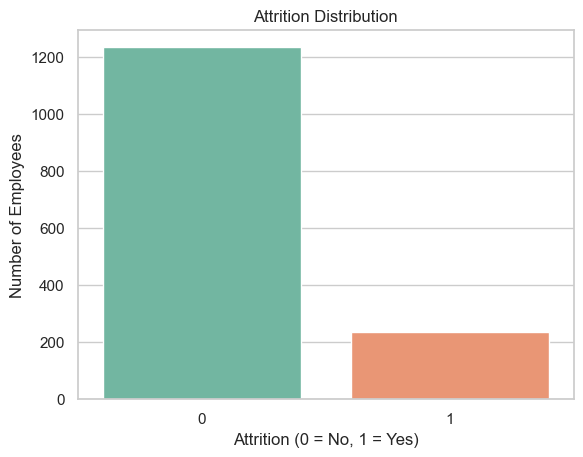

In [18]:
# Step 4: Exploratory Data Analysis

sns.set_theme(style='whitegrid')

sns.countplot(
    x='Attrition',
    hue='Attrition',     
    data=df,
    palette=['#66c2a5', '#fc8d62'],
    legend=False             
)

plt.title('Attrition Distribution')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.show()

#### The bar chart indicates an imbalanced data set. This may impact model effectiveness. 

#### Most employees remain with the company. Only a minority—approximately 17%—left during the recorded period.

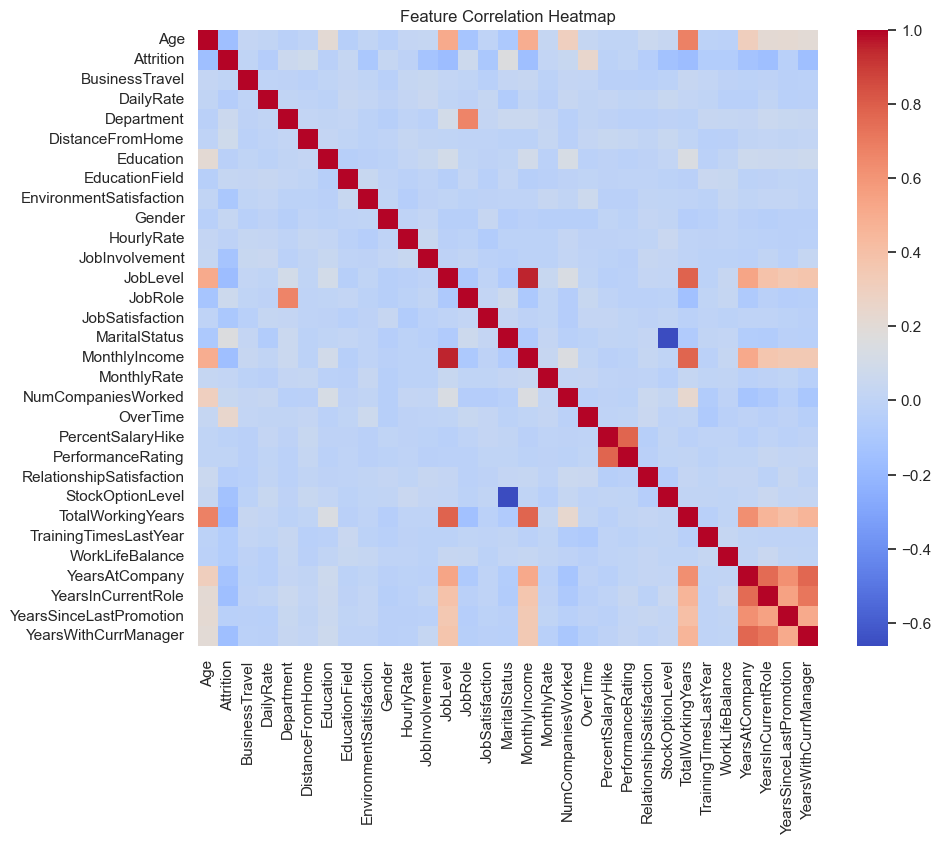

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

#### The correlation heatmap confirmed that no single variable strongly predicts attrition on its own. 

#### However, moderate positive correlations with variables like OverTime suggest that workload pressure may drive attrition. 

#### Similarly, lower income levels and younger age groups showed weak negative correlations with attrition, aligning with our domain knowledge of retention challenges.

### Model Performance and Evaluation

In [6]:
# Step 5: Modeling

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Ensemble Voting Classifier
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgb', xgb)], voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_w...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

ROC-AUC: 0.8059264363855628

Model: Random Forest
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294

ROC-AUC: 0.7876647428719097

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   mac

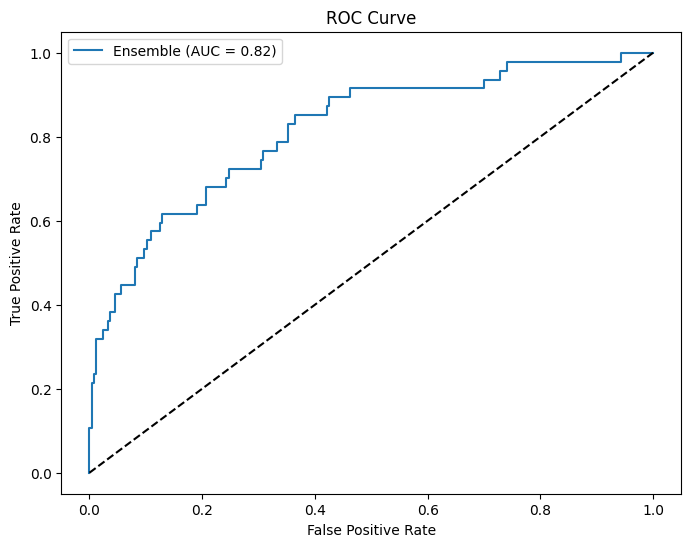

In [7]:
# Step 6: Evaluation
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb, 'Ensemble': ensemble}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\nModel: {name}')
    print(classification_report(y_test, y_pred))
    print('ROC-AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Plot ROC Curve for Ensemble
y_probs = ensemble.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Ensemble (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

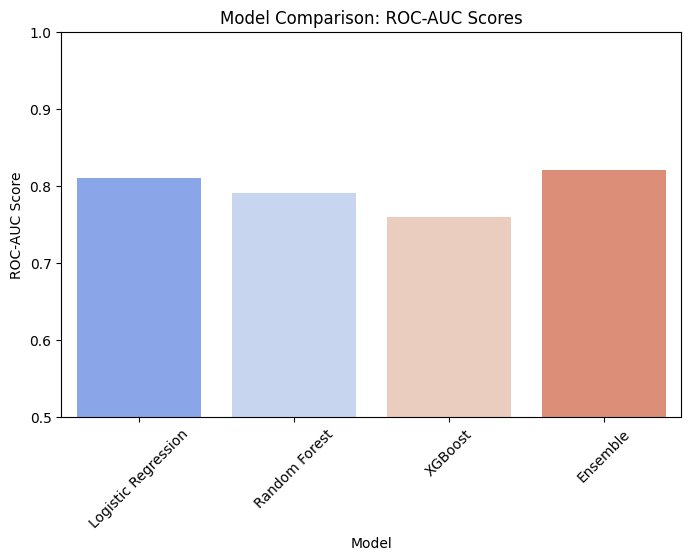

In [10]:
# Model ROC-AUC Scores Comparison
model_auc_scores = {
    'Logistic Regression': 0.81,
    'Random Forest': 0.79,
    'XGBoost': 0.76,
    'Ensemble': 0.82
}

# Create DataFrame for plotting
df_auc = pd.DataFrame({
    'Model': list(model_auc_scores.keys()),
    'ROC_AUC': list(model_auc_scores.values())
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_auc, x='Model', y='ROC_AUC', hue='Model', palette='coolwarm', legend=False)
plt.ylabel('ROC-AUC Score')
plt.title('Model Comparison: ROC-AUC Scores')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()

#### Random Forest model highlighted workload, income, and employee demographics as key attrition factors.

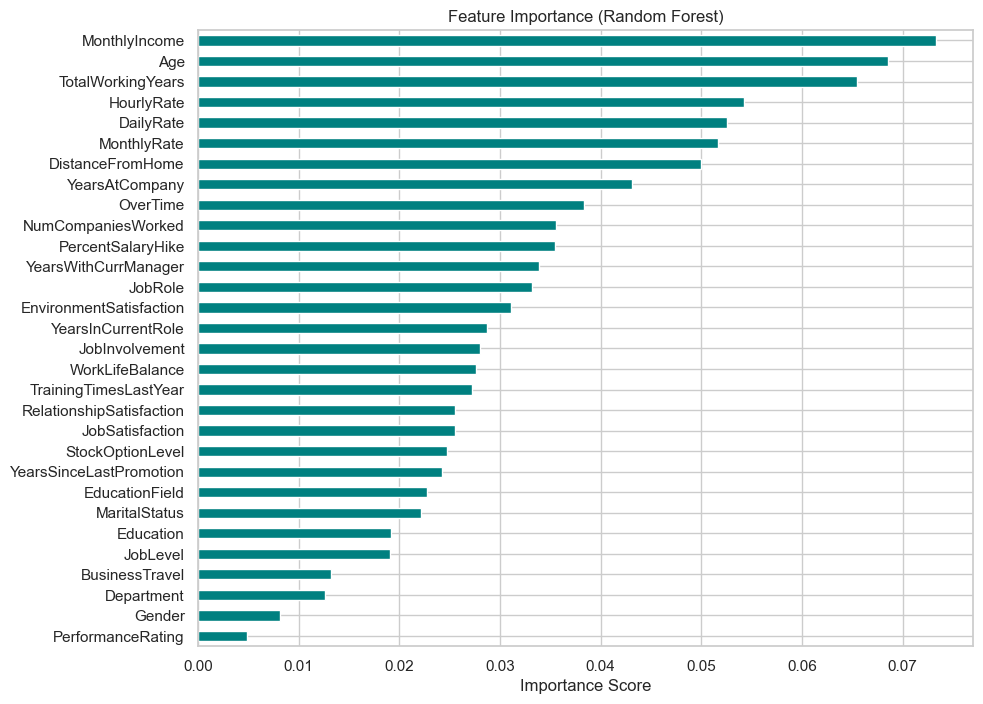

In [15]:
# Step 7: Feature Importance (Random Forest Example)
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,8))
feat_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()